<a href="https://colab.research.google.com/github/ifiokokon/Hamoye-Data-Science-Internship/blob/master/MACHINE_LEARNING_REGRESSION_PREDICTING_ENERGY_EFFICIENCY_OF_BUILDINGS_Quiz_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FIRST IMPORT THE VARIOUS LIBRARIES**

In [1]:
#importing packages and classes
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import sklearn as sklearn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#import the dataset for analysis
energy_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
energy_df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


Dataset Description
The dataset for the remainder of this quiz is the Appliances Energy Prediction data. The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters). The attribute information can be seen below.

Attribute Information:

Date, time year-month-day hour:minute:second

Appliances, energy use in Wh

lights, energy use of light fixtures in the house in Wh

T1, Temperature in kitchen area, in Celsius

RH_1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius

RH_2, Humidity in living room area, in %

T3, Temperature in laundry room area

RH_3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius

RH_4, Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH_5, Humidity in bathroom, in %

T6, Temperature outside the building (north side), in Celsius

RH_6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH_7, Humidity in ironing room, in %

T8, Temperature in teenager room 2, in Celsius

RH_8, Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH_9, Humidity in parents room, in %

To, Temperature outside (from Chievres weather station), in Celsius

Pressure (from Chievres weather station), in mm Hg

RH_out, Humidity outside (from Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â °C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

To answer some questions, you will need to normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a  random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set.

In [3]:
#checking for null values 
energy_df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [4]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
#exploratory data analysis on the data set
energy_df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [6]:
#The date and lights columns are dropped since they do not affect the outcome of the project
energy_df.drop(columns=['date','lights'],axis=1,inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff324181ef0>,
      dtype=object)

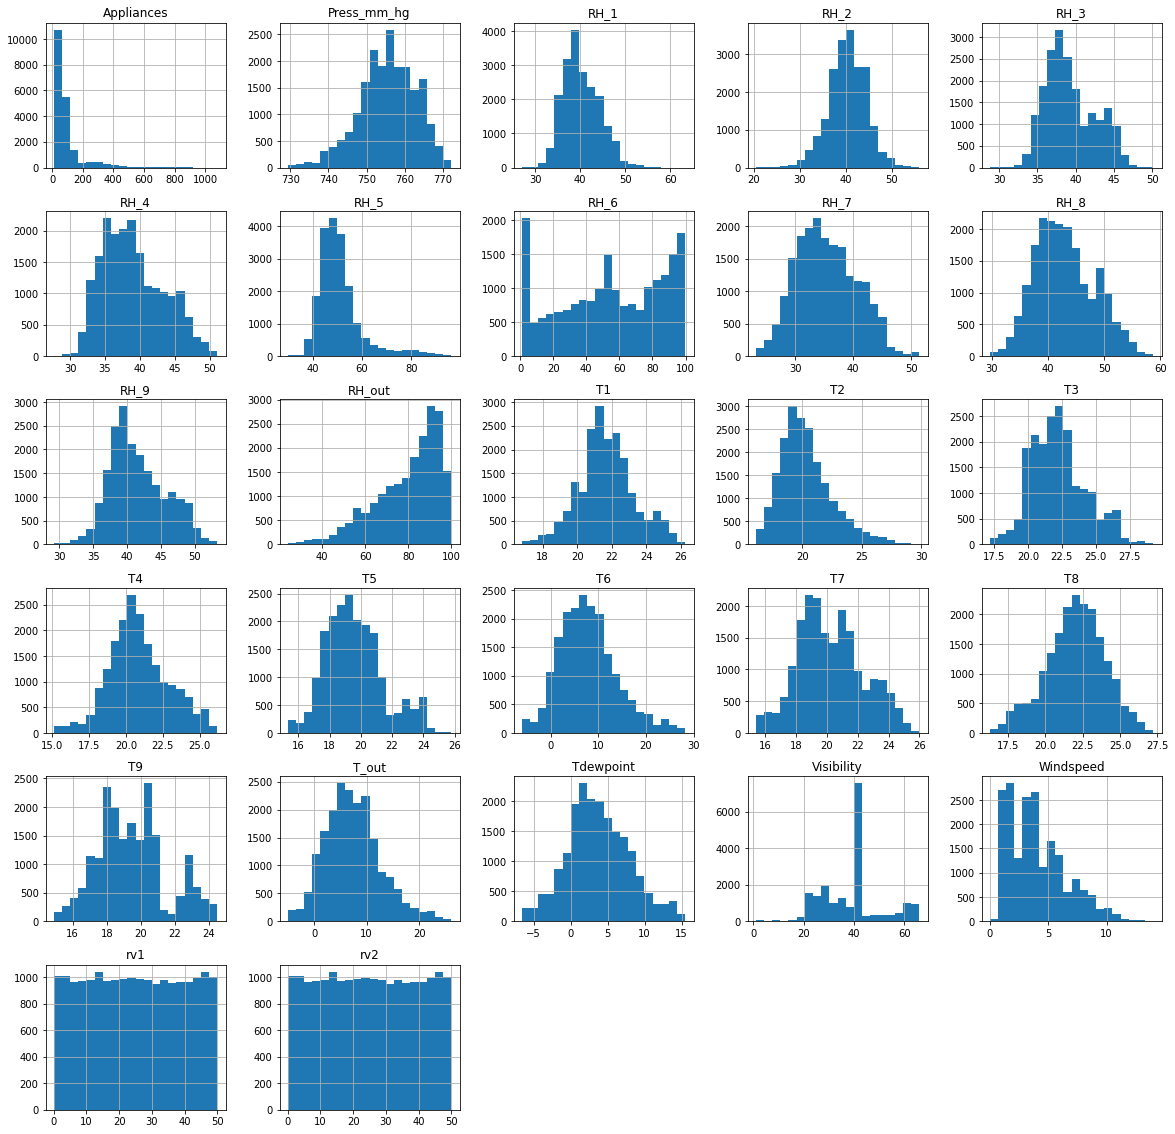

In [7]:
energy_df.hist(bins=20, figsize=(20,20))

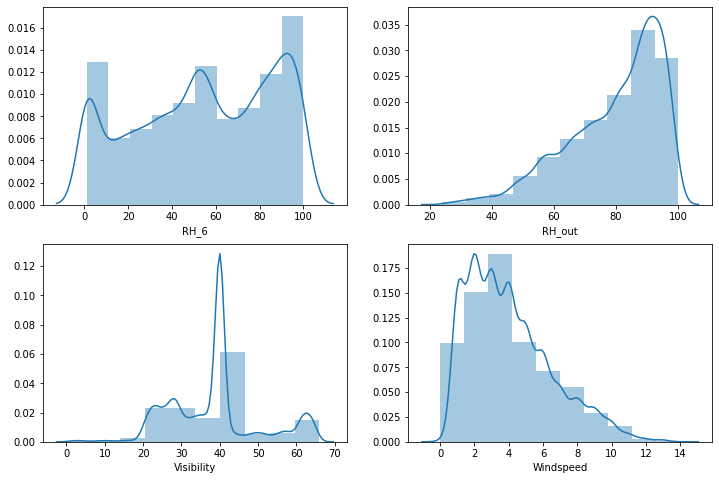

In [8]:
fig, ax = plt.subplots(2,2,figsize=(12,8))
ax1 = sns.distplot(energy_df["RH_6"],  bins=10, ax= ax[0][0])
ax2 = sns.distplot(energy_df["RH_out"],bins=10, ax=ax[0][1])
ax3 = sns.distplot(energy_df["Visibility"],bins=10, ax=ax[1][0])
ax4 = sns.distplot(energy_df["Windspeed"],bins=10, ax=ax[1][1])

In [9]:
# calculating the percentage of appliance enegry consumption less than 200 wh
print(f" Percentage of the appliance energy consumption less than 200 Wh is: {round((energy_df[energy_df['Appliances'] <= 200]['Appliances'].count()) / len(energy_df['Appliances']) * 100, 2)}%")

 Percentage of the appliance energy consumption less than 200 Wh is: 90.29%


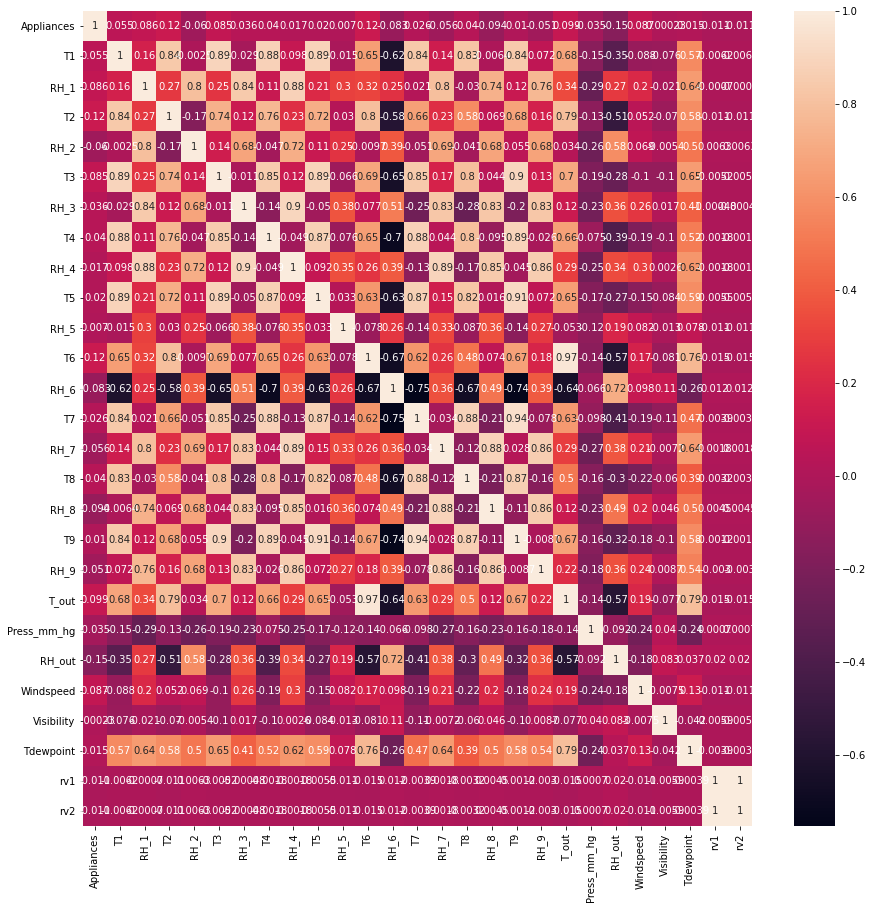

In [10]:
# Use the weather , temperature , applainces and random column to see the correlation
corr = energy_df.corr()
  
fig = plt.figure(figsize=(15, 15))

sns.heatmap(corr, annot=True)

In [11]:
def get_redundant_pairs(energy_df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = energy_df.columns
    for i in range(0, energy_df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [12]:
def get_top_abs_correlations(energy_df, n=5):
    au_corr = energy_df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(energy_df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [13]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(energy_df, 40))

Top Absolute Correlations
rv1   rv2      1.000000
T6    T_out    0.974787
T7    T9       0.944776
T5    T9       0.911055
T3    T9       0.901324
RH_3  RH_4     0.898978
RH_4  RH_7     0.894301
T1    T3       0.892402
T4    T9       0.889439
T3    T5       0.888169
T1    T5       0.885247
RH_7  RH_8     0.883984
T7    T8       0.882123
RH_1  RH_4     0.880359
T4    T7       0.877763
T1    T4       0.877001
T4    T5       0.871813
T5    T7       0.870624
T8    T9       0.869338
RH_7  RH_9     0.858686
RH_4  RH_9     0.856591
RH_8  RH_9     0.855812
T3    T4       0.852778
      T7       0.847374
RH_4  RH_8     0.847259
T1    T9       0.844777
RH_1  RH_3     0.844677
T1    T7       0.838705
      T2       0.836834
RH_3  RH_9     0.833538
      RH_7     0.832685
      RH_8     0.828822
T1    T8       0.825413
T5    T8       0.824981
T2    T6       0.801186
RH_1  RH_7     0.801122
      RH_2     0.797535
T4    T8       0.796256
T3    T8       0.795283
T2    T_out    0.792255
dtype: float64

In [14]:
# lets see how each features correlates with the target column
cor_matrix = energy_df.corr().sort_values('Appliances', ascending=False)
cor_matrix['Appliances']

Appliances     1.000000
T2             0.120073
T6             0.117638
T_out          0.099155
Windspeed      0.087122
RH_1           0.086031
T3             0.085060
T1             0.055447
T4             0.040281
T8             0.039572
RH_3           0.036292
T7             0.025801
T5             0.019760
RH_4           0.016965
Tdewpoint      0.015353
T9             0.010010
RH_5           0.006955
Visibility     0.000230
rv1           -0.011145
rv2           -0.011145
Press_mm_hg   -0.034885
RH_9          -0.051462
RH_7          -0.055642
RH_2          -0.060465
RH_6          -0.083178
RH_8          -0.094039
RH_out        -0.152282
Name: Appliances, dtype: float64

In [15]:
x = energy_df['T2']
y = energy_df['T6']

In [16]:
array = np.array([x])
x_feature = array.reshape(-1, 1)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_feature, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression
Linear_model = LinearRegression()
Linear_model.fit(x_train, y_train)
predicted_values = Linear_model.predict(x_test)

In [18]:
from sklearn.metrics import r2_score

r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)

0.64

In [19]:
# Applying MinMaxScaler to scale the features column 

from sklearn.preprocessing import MinMaxScaler

# instantiate the scaler
scaler = MinMaxScaler()

# normalizing the features
normalized_df = pd.DataFrame(scaler.fit_transform(energy_df), columns=energy_df.columns)

In [20]:
# splitting data into features(independent) and target(dependent) variables

# predictors
features_df = normalized_df.drop(['Appliances'], axis=1)

# target variable
target_df = normalized_df['Appliances']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.3, random_state=42)

In [23]:
print(f'shape of training set is {x_train.shape}')
print(f'shape of testing set is {x_test.shape}')

shape of training set is (13814, 26)
shape of testing set is (5921, 26)


In [24]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

linear_model.fit(x_train, y_train)

predicted_values = linear_model.predict(x_test)

In [25]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.05

In [26]:
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2)

45.35

In [27]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)


0.088

In [28]:
from sklearn.metrics import r2_score

r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)

0.15

In [29]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.4)

ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [30]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.088

In [31]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.001)

lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [32]:
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_2,-0.456698,-0.411071,-0.000000
1,T_out,-0.321860,-0.262172,0.000000
2,T2,-0.236178,-0.201397,0.000000
3,T9,-0.189941,-0.188916,-0.000000
4,RH_8,-0.157595,-0.156830,-0.000110
5,RH_out,-0.077671,-0.054724,-0.049557
6,RH_7,-0.044614,-0.045977,-0.000000
7,RH_9,-0.039800,-0.041367,-0.000000
8,T5,-0.015657,-0.019853,-0.000000
9,T1,-0.003281,-0.018406,0.000000


In [33]:
# importing the required algorithms
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# import the evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# create a dictionary of different algorithms 
models = {'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet':ElasticNet(),
        'LinearRegression':LinearRegression(),
        'KNeighborsRegressor':KNeighborsRegressor(),
        'RandomForestRegressor':RandomForestRegressor(),
        'ExtraTreesRegressor':ExtraTreesRegressor(),
        'GradientBoostingRegressor':GradientBoostingRegressor(),
        'DecisionTreeRegressor':DecisionTreeRegressor()}

In [34]:

# helper funtion to compute the score, RMSE, time on the training and testing set

def pipeline(models, x_train, x_test, y_train, y_test):
        
    # store properties of each model
    prop = []
    
    # loop through the dictionary of models
    for reg_name, regressor in models.items():
        # empty dict for storing properties of each models
        reg_dict = {}
        # store the name of each model
        reg_dict['Name'] = reg_name
        # fit the regressor model
        regressor.fit(x_train, y_train)
        # compute the Train_score
        reg_dict['Train_score'] = regressor.score(x_train, y_train)
        # compute the test scores
        reg_dict['Test_score'] = regressor.score(x_test, y_test)
        # compute the mean_absolute_error
        reg_dict['MAE'] = mean_absolute_error(y_test, regressor.predict(x_test))
        #compute the mean_squared_error
        reg_dict['MSE'] = mean_squared_error(y_test, regressor.predict(x_test))
        # compute the RMSE
        reg_dict['RMSE'] = np.sqrt(mean_squared_error(y_test, regressor.predict(x_test)))
        # append the properties of a single regressor to the prop list
        prop.append(reg_dict)
     
    # create a dataframe with a list of all the model properties
    summary_df = pd.DataFrame(prop)
    
    # plot a bar chart to visualize the performance of each model
    summary_df.plot(x='Name', y=['Train_score', 'Test_score', 'MAE', 'MSE', 'RMSE'], kind='bar', figsize=(15,10),
               title='Performance scores of different models')
        
        
    return summary_df

,Name,Train_score,Test_score,MAE,MSE,RMSE
0,Ridge,0.143766,0.147535,0.050069,0.007671,0.087585
1,Lasso,0.000000,-0.000001,0.056523,0.008999,0.094862
2,ElasticNet,0.000000,-0.000001,0.056523,0.008999,0.094862
3,LinearRegression,0.144719,0.148902,0.050134,0.007659,0.087514
4,KNeighborsRegressor,0.544932,0.271799,0.040243,0.006553,0.080950
5,RandomForestRegressor,0.936251,0.563010,0.030148,0.003932,0.062708
6,ExtraTreesRegressor,1.000000,0.623824,0.027162,0.003385,0.058182
7,GradientBoostingRegressor,0.337396,0.242722,0.045404,0.006815,0.082550
8,DecisionTreeRegressor,1.000000,0.192826,0.036406,0.007264,0.085226


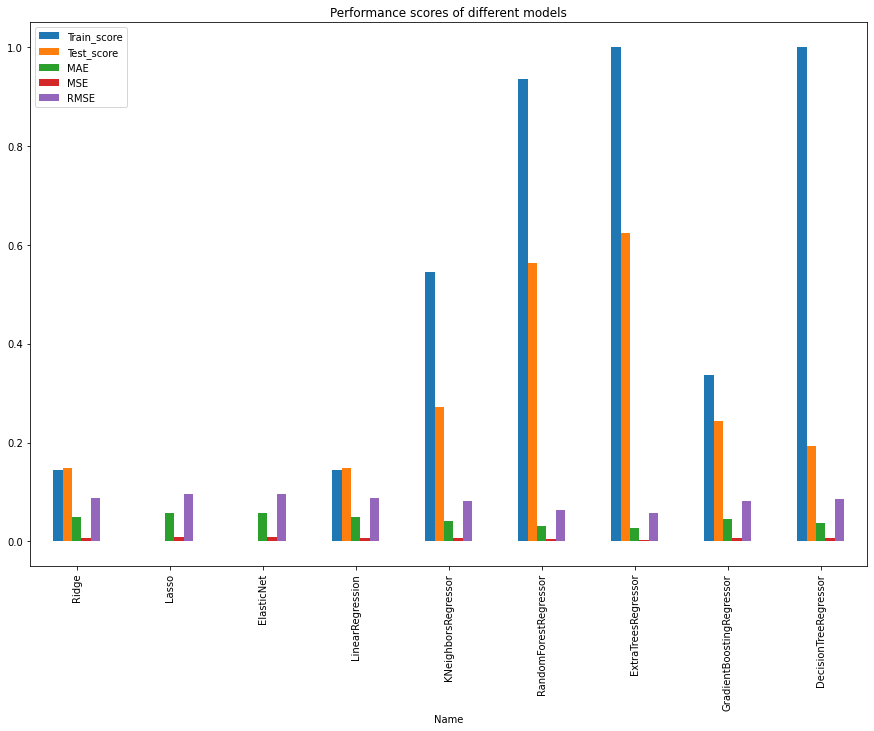

In [35]:
# execute the function
pipeline(models, x_train, x_test, y_train, y_test)